Author: TRB

# 4. Data visualisation and peak fitting

### Goals

- create your first own Git repository
- reading iSCAMS data from a file and rescale the values
- plot a histogram using the package *matplotlib* and save the plot to a file
- fit a gaussian function to the histogram with the package *scipy* and determine the average protein mass

### Introduction

In this folder you will find the file ``hsp165.txt`` that contains the interferometric contrasts of single proteins (HSP 16.5) measured by iSCAMS (stands for interferometric scattering mass spectrometry). The interferometric contrast is proportional to the particle mass (for this measurement an interferometric contrast of $\approx2.2\times10^{-5}$ corresponds to a protein mass of 1 kDa.

In [74]:
# Before we start we need to import the maths library
import numpy as np
# a library with tools for scientific data analysis
import scipy

### *TASK 1*

Load the interferometric contrasts from the file into a *numpy-array* of floating point values. Determine the number of values in the array and confirm that the number matches the number of lines in the file ``hsp164.txt`` (check this number for example by opening the file in a text editor).

In [4]:
import numpy as np
import scipy

contrast_array = np.zeros(2474)
count = 0

filename='hsp165.txt'
with open(filename,'r') as file:
    list = file.readlines()
    no_values = len(list)
    print(no_values)
    for data in list:
        contrast_array[count:] = data
        count = count + 1
        
print(contrast_array)

2474
[0.00979555 0.00748597 0.00842761 ... 0.00144174 0.00839219 0.00839848]


### *TASK 2*

Convert the measured interferometric contrasts into the unit kDa and and use the *numpy-array* methods to determine the 

- minimum
- maximum
- mean
- standard deviation

of the converted values and print your results to the screen.

In [5]:
import numpy as np
import scipy

filename='hsp165.txt'

def get_protein_masses():
    
    protein_masses = np.zeros(2474)
    count = 0
    
    with open(filename,'r') as file:
        list = file.readlines()
        no_values = len(list)
        print("There are", no_values, "data points.")
        for data in list:
            protein_masses[count:] = float(data)/float(2.2*10**-5)
            count=count+1

    mass_min = protein_masses.min()
    mass_max = protein_masses.max()
    mass_mean = protein_masses.mean()
    mass_std = protein_masses.std()
    print("The minimum protein mass is", format(mass_min, '.2f'), "kDa")
    print("The maximum protein mass is", format(mass_max, '.2f'), "kDa")
    print("The mean protein mass is", format(mass_mean, '.2f'), "kDa")
    print("The standard deviation of protein mass is", format(mass_std, '.2f'), "kDa")

get_protein_masses()

There are 2474 data points.
The minimum protein mass is 51.25 kDa
The maximum protein mass is 2350.79 kDa
The mean protein mass is 398.26 kDa
The standard deviation of protein mass is 89.46 kDa


### *TASK 3*

a) Use the function [*matplotlib.pyplot.histogram*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to calculate and display the histogram of the measured values.

b) Adjust the parameters ``bins`` and ``range`` to improve your plot.


c) Annotate your axes by using the functions [*matplotlib.pyplot.xlabel*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) and [*matplotlib.pyplot.ylabel*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html).

d) Save the histogram to a PNG file ``hist_hsp.png`` at 400 dpi resolution (search on the web for the suitable *matplotlib* function).

In [111]:
# Import of the matplotlib package for plotting
import matplotlib
# and magic to activate inline-plotting between the notebook cells
%matplotlib inline

There are 2474 data points.
The minimum protein mass is 51.25 kDa
The maximum protein mass is 2350.79 kDa
The mean protein mass is 398.26 kDa
The standard deviation of protein mass is 89.46 kDa


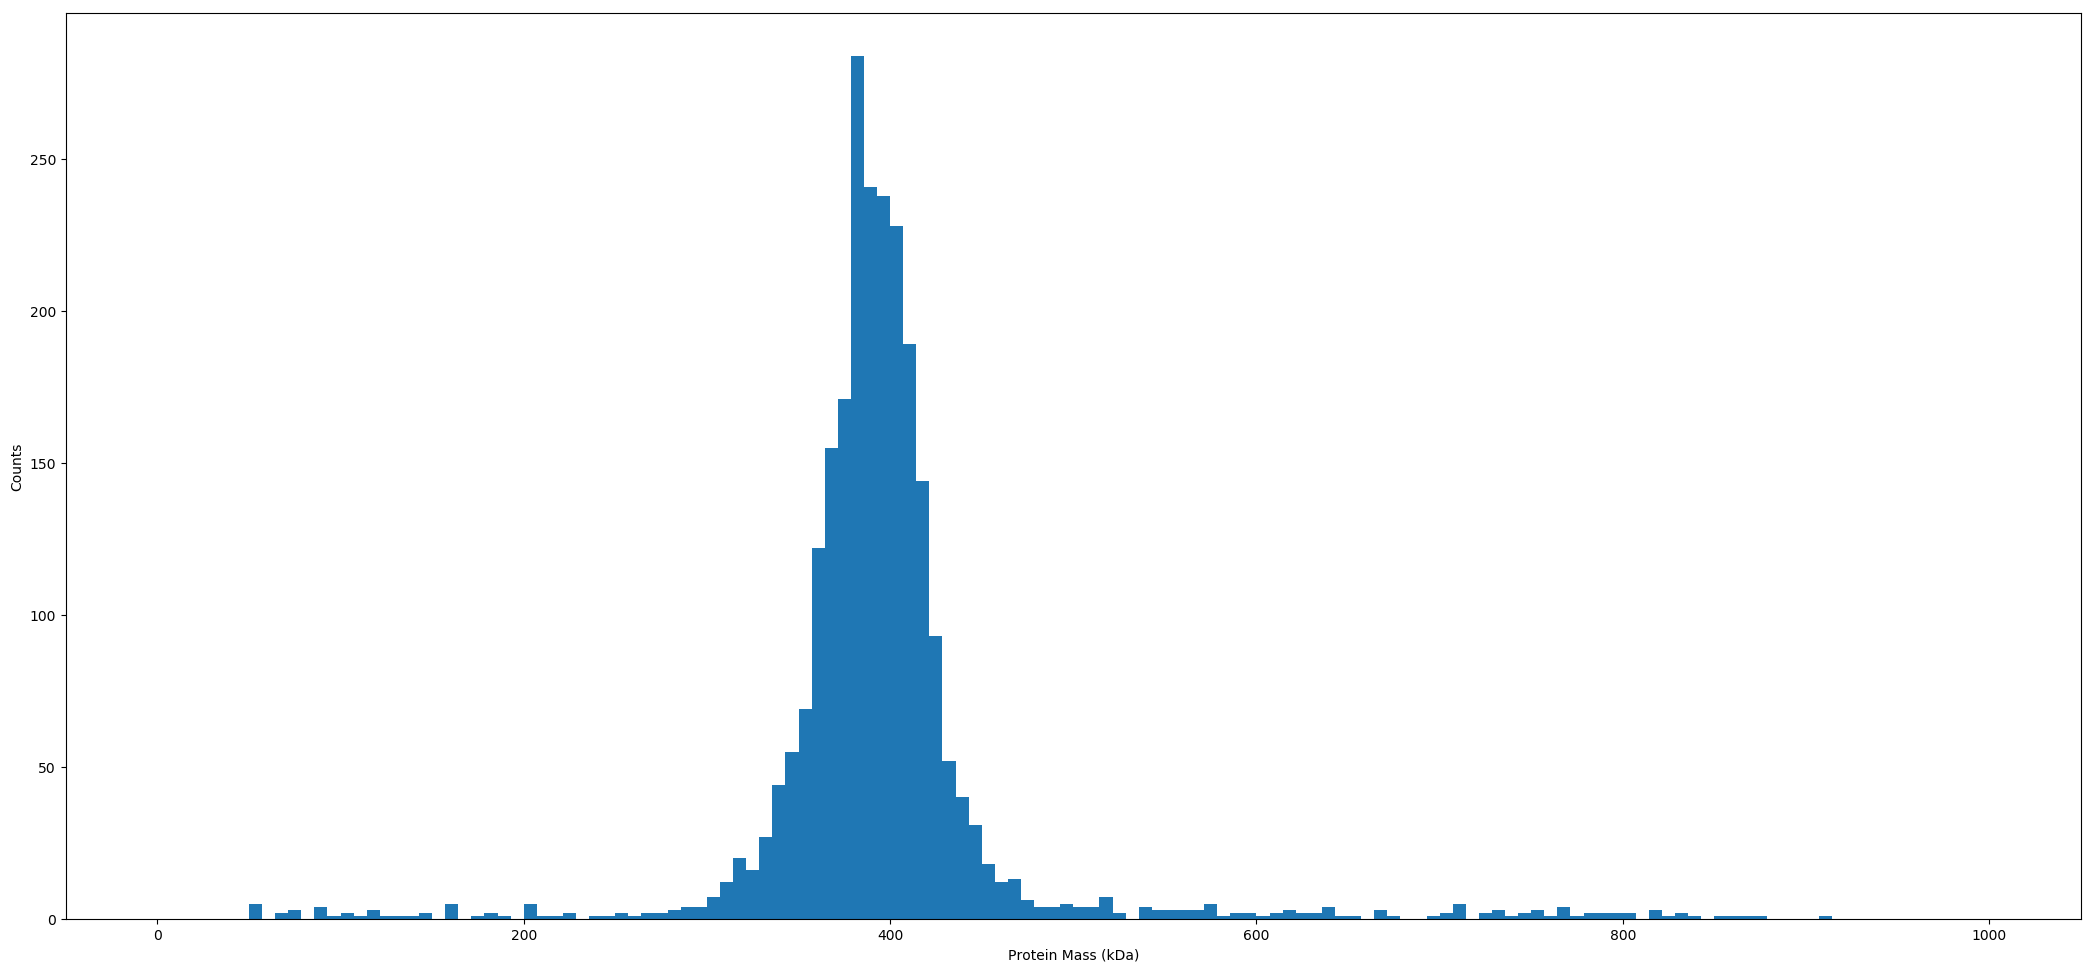

In [26]:
import numpy as np
import scipy
import matplotlib as plt                   #Import of the matplotlib package for plotting, and magic to activate inline-plotting between the notebook cells
%matplotlib inline                   


filename='hsp165.txt'

def get_protein_masses():
    
    protein_masses = np.zeros(2474)
    count = 0
    
    with open(filename,'r') as file:
        list = file.readlines()
        no_values = len(list)
        print("There are", no_values, "data points.")
        for data in list:
            protein_masses[count:] = float(data)/float(2.2*10**-5)
            count=count+1

    mass_min = protein_masses.min()
    mass_max = protein_masses.max()
    mass_mean = protein_masses.mean()
    mass_std = protein_masses.std()
    print("The minimum protein mass is", format(mass_min, '.2f'), "kDa")
    print("The maximum protein mass is", format(mass_max, '.2f'), "kDa")
    print("The mean protein mass is", format(mass_mean, '.2f'), "kDa")
    print("The standard deviation of protein mass is", format(mass_std, '.2f'), "kDa")
    return protein_masses

protein_masses = get_protein_masses()

def plot_histogram(input_array):
    figure(figsize=(26, 12), dpi=100, facecolor='w', edgecolor='k')
    plt.pyplot.hist(input_array, 140, range = (0, 1000))
    plt.pyplot.xlabel('Protein Mass (kDa)')
    plt.pyplot.ylabel('Counts')

    
plot_histogram(protein_masses)
    

### *TASK 4*

a) The function [*matplotlib.pyplot.histogram*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) returns three objects. We are interested in the first two:

  - *numpy-array* of histogram values (number of particles that had a mass within the limits of the respective bin)
  - *numpy-array* of the limits of the histogram bins

 Save the two arrays as ``hist`` and ``m_edges`` and check their lengths. Why are they not the same?
 Save the third array into the variable ``_``.
 
b) Calculate the *numpy-array* ``m_centers`` with values between the values of ``m_edges`` and a length ``len(m_edges)-1``.

c) Make a line plot of ``m_centers`` vs. ``hist`` by using the function [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). 

d) Label the axes.

e) Use the same function as in *TASK 3* to save the plot to the PNG file ``hist_hsp_line.png`` at 400 dpi resolution.

There are 2474 data points.
The minimum protein mass is 51.25 kDa
The maximum protein mass is 2350.79 kDa
The mean protein mass is 398.26 kDa
The standard deviation of protein mass is 89.46 kDa


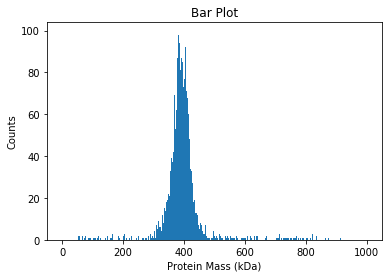

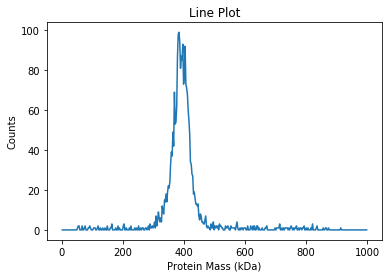

<Figure size 6400x3200 with 0 Axes>

In [112]:
import numpy as np
import scipy
import matplotlib as plt                   #Import of the matplotlib package for plotting, and magic to activate inline-plotting between the notebook cells
%matplotlib inline                   
from matplotlib.pyplot import figure

filename='hsp165.txt'
    
protein_masses = np.zeros(2474)
count = 0

#----------------------------------------------------------------------------------
    
with open(filename,'r') as file:
    list = file.readlines()
    no_values = len(list)
    print("There are", no_values, "data points.")
    for data in list:
        protein_masses[count:] = float(data)/float(2.2*10**-5)
        count=count+1

mass_min = protein_masses.min()
mass_max = protein_masses.max()
mass_mean = protein_masses.mean()
mass_std = protein_masses.std()
print("The minimum protein mass is", format(mass_min, '.2f'), "kDa")
print("The maximum protein mass is", format(mass_max, '.2f'), "kDa")
print("The mean protein mass is", format(mass_mean, '.2f'), "kDa")
print("The standard deviation of protein mass is", format(mass_std, '.2f'), "kDa")

#----------------------------------------------------------------------------------

fig1, ax1 = plt.pyplot.subplots()
fig2, ax2 = plt.pyplot.subplots()
figure(figsize=(4,2), dpi=1600, facecolor='w', edgecolor='k')
n, bins, patches = ax1.hist(protein_masses, 400, range = (0, 1000))
ax1.set_xlabel('Protein Mass (kDa)')
ax1.set_ylabel('Counts')
ax1.set_title('Bar Plot')

m_edges = bins
_ = patches
    
m_centres = m_edges + (m_edges[1] - m_edges[0])/2
m_centres = np.delete(m_centres, -1)
    
ax2.plot(m_centres, hist)
ax2.set_xlabel('Protein Mass (kDa)')
ax2.set_ylabel('Counts')
ax2.set_title('Line Plot')
fig2.savefig('line_plot.png', dpi=400)


### *TASK *

In taks 5 we want to determine the mass of HSP 16.5 by fitting a Gaussian function to the histogram.

The Gaussian function is defined as 

$$g(x) = A_0 \exp\left( -\frac{\left(m-m_0\right)^2}{2 \sigma^2} \right)$$

a) Write a corresponding Python function ``gauss(m, A0, m0, sigma)`` that returns $g(x)$.

b) Assign the default values $A_0=1$, $m_0=0$, $\sigma=1$.

c) Confirm that the function returns the value $e^{-1/2}\approx0.61$ for $m=1$, $A_0=1$, $m_0=0$, and $\sigma=1$. 

In [84]:
def gauss(m, A0, m0, sigma):
    g = A0*np.exp(-(m-m0)**2/(2*sigma**2))
    return g

A0 = 1
m0 = 0
sigma = 1

gauss(1,A0,m0,sigma)

0.6065306597126334

### *TASK 6*

The function [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) can solve nonlinear least-squares problems. We will use this function to identify the Gaussian model (with parameters $A_0$, $m_0$, and $\sigma$) that best matches the measured data. The fitted values $m_0$ and $\sigma$ provide estimates for the mass of HSP 16.5 and the spread of the measured values, respectively.

a) Define a function ``err(x)`` that calculates the fit residual (difference of fit and measured data). For using this function later, to call [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html), the argument of ``err`` has to be a tuple of all model parameters, here ``x=(A0, x0, sigma)``.

b) For convergence to the correct solution a guess for the model parameters has to be passed to [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). Define a starting guess ``x0`` as a tuple of three guessed values for $A_0$, $m_0$, and $\sigma$. Use the plot that you generated in *TASK 4* to guess the parameters.

c) Call ``(A0_fit, x0_fit, sigma_fit) = scipy.optimize.least_squares(err, x0).x0`` and both data and result with consecutive calls of [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

d) Print the fitted parameters $m_0$ and $\sigma$ to the screen and compare to the values obtained in *TASK 2*.

**Advanced**: Make a legend by using the ``label`` parameter of [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) and by calling at the end of the cell [*matplotlib.pyplot.legend*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

In [117]:
from scipy.optimize import least_squares

x0=(A0,m0,sigma)
    
def gauss(m, A0, m0, sigma):
    g = A0*np.exp(-(m-m0)**2/(2*sigma**2))
    return gauss

def err(x):
    A0, x0, sigma = x
    gauss(1,A0,m0,sigma)
    return hist - gauss
    
A0_guess, m0_guess, sigma_guess = x0
A0_guess = 1
m0_guess = 398
sigma_guess = 89

(A0_fit, x0_fit, sigma_fit) = scipy.optimize.least_squares(err, x0).x0
    

TypeError: unsupported operand type(s) for -: 'float' and 'function'